In [22]:
# reference
#https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-download-auto-examples-svm-plot-oneclass-py
# https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

In [23]:
%matplotlib inline

In [24]:
import numpy as np
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [26]:
# -5와 5 사이에 500개 값 생성
# x,y축으로 그리드 생성
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

In [27]:
xx

array([[-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       ...,
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ],
       [-5.        , -4.97995992, -4.95991984, ...,  4.95991984,
         4.97995992,  5.        ]])

In [28]:
yy

array([[-5.        , -5.        , -5.        , ..., -5.        ,
        -5.        , -5.        ],
       [-4.97995992, -4.97995992, -4.97995992, ..., -4.97995992,
        -4.97995992, -4.97995992],
       [-4.95991984, -4.95991984, -4.95991984, ..., -4.95991984,
        -4.95991984, -4.95991984],
       ...,
       [ 4.95991984,  4.95991984,  4.95991984, ...,  4.95991984,
         4.95991984,  4.95991984],
       [ 4.97995992,  4.97995992,  4.97995992, ...,  4.97995992,
         4.97995992,  4.97995992],
       [ 5.        ,  5.        ,  5.        , ...,  5.        ,
         5.        ,  5.        ]])

In [29]:
# 훈련 데이터 생성
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# 주기적인 새로운 관측치 생성
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# 비정상적인 새로운 관측치 생성
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [30]:
X_train

array([[ 1.98460929,  1.46911209],
       [ 2.11865779,  2.13210484],
       [ 1.86268859,  1.79583322],
       [ 2.09695679,  2.13083733],
       [ 1.85026018,  2.04978937],
       [ 2.48289539,  1.92264499],
       [ 2.02312056,  1.66061631],
       [ 2.13739352,  2.19537223],
       [ 1.8247013 ,  2.13968698],
       [ 1.62203193,  1.6102897 ],
       [ 1.71945672,  2.38007526],
       [ 1.98077859,  2.12541822],
       [ 2.3659492 ,  2.23320841],
       [ 1.6552711 ,  2.08721888],
       [ 2.49109897,  2.09542245],
       [ 2.04215853,  2.61882894],
       [ 2.36073332,  2.16731433],
       [ 1.99402233,  2.05778793],
       [ 2.2800691 ,  2.17148749],
       [ 2.03717184,  1.77754442],
       [ 2.2475981 ,  2.21685735],
       [ 1.89675956,  2.02796577],
       [ 1.84837587,  1.62104611],
       [ 1.74587803,  1.7377134 ],
       [ 2.04831661,  2.34097949],
       [ 2.27909481,  1.78994426],
       [ 1.66343949,  1.86873053],
       [ 2.29511969,  1.88153292],
       [ 2.03483042,

In [31]:
X_test

array([[ 1.93318082,  2.27266154],
       [ 2.29321376,  2.03550244],
       [ 1.99761299,  2.2104418 ],
       [ 2.24599009,  2.31942728],
       [ 2.04898829,  1.99962316],
       [ 2.36231834,  1.82534938],
       [ 1.91800678,  2.24714016],
       [ 2.23302122,  2.01669473],
       [ 2.26168547,  2.15335261],
       [ 2.20088061,  2.06454381],
       [ 1.88771413,  2.12720132],
       [ 1.76750799,  1.68417726],
       [ 2.02359674,  2.01795311],
       [ 2.1653121 ,  1.69291377],
       [ 2.28119324,  2.19833765],
       [ 1.84562397,  1.76372575],
       [ 2.25172538,  2.05868111],
       [ 2.01393528,  2.60647131],
       [ 1.8399387 ,  1.73184773],
       [ 1.69441468,  1.94441554],
       [-2.06681918, -1.72733846],
       [-1.70678624, -1.96449756],
       [-2.00238701, -1.7895582 ],
       [-1.75400991, -1.68057272],
       [-1.95101171, -2.00037684],
       [-1.63768166, -2.17465062],
       [-2.08199322, -1.75285984],
       [-1.76697878, -1.98330527],
       [-1.73831453,

In [32]:
X_outliers

array([[-0.87372666, -3.12152739],
       [ 3.63901774, -0.22704121],
       [-2.99904161,  1.72992589],
       [-3.86686913,  1.45865098],
       [-0.50067122,  1.17486996],
       [-1.72970603, -3.02222451],
       [-2.89119408,  0.12907714],
       [ 0.27749024,  2.30505506],
       [ 2.66113436,  2.18433989],
       [ 2.21998685, -1.66558558],
       [ 3.75045283, -3.97950211],
       [ 3.99525933, -1.20924196],
       [ 1.14356661, -0.09930997],
       [-3.91472282,  3.10918963],
       [ 1.77016176,  0.74806577],
       [ 2.32196967,  2.13896116],
       [-1.90475429,  2.52391469],
       [ 2.60200636,  2.82396075],
       [ 1.27353495,  0.74016963],
       [ 0.15993207, -1.31425613]])

In [33]:
clf = svm.OneClassSVM(nu = 0.1, kernel = "rbf", gamma = 0.1)

In [34]:
clf.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.1)

In [35]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [36]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [37]:
print(n_error_train)
print(n_error_test)
print(n_error_outliers)

20
1
1


In [38]:
X_test[:10]

array([[1.93318082, 2.27266154],
       [2.29321376, 2.03550244],
       [1.99761299, 2.2104418 ],
       [2.24599009, 2.31942728],
       [2.04898829, 1.99962316],
       [2.36231834, 1.82534938],
       [1.91800678, 2.24714016],
       [2.23302122, 2.01669473],
       [2.26168547, 2.15335261],
       [2.20088061, 2.06454381]])

In [39]:
X_outliers[:10]

array([[-0.87372666, -3.12152739],
       [ 3.63901774, -0.22704121],
       [-2.99904161,  1.72992589],
       [-3.86686913,  1.45865098],
       [-0.50067122,  1.17486996],
       [-1.72970603, -3.02222451],
       [-2.89119408,  0.12907714],
       [ 0.27749024,  2.30505506],
       [ 2.66113436,  2.18433989],
       [ 2.21998685, -1.66558558]])

In [40]:
print(len(X_outliers))

20


In [41]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

print(len(Z))

500


In [42]:
Z

array([[-7.7200909 , -7.69780206, -7.67542034, ..., -9.62805147,
        -9.62932207, -9.63056919],
       [-7.69835284, -7.67581939, -7.65319205, ..., -9.62674195,
        -9.62803281, -9.62929988],
       [-7.67653112, -7.65375213, -7.63087823, ..., -9.62540762,
        -9.62671902, -9.62800637],
       ...,
       [-9.62470813, -9.62334086, -9.62194795, ..., -7.67828704,
        -7.70097518, -7.72356327],
       [-9.62604383, -9.6246978 , -9.62332643, ..., -7.70005405,
        -7.72249776, -7.74484249],
       [-9.62735494, -9.62602985, -9.62467973, ..., -7.72173773,
        -7.74393793, -7.76604022]])

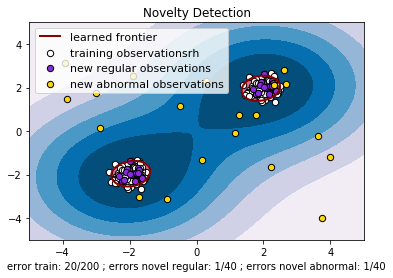

In [43]:
# 특이치 탐지
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)

a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observationsrh",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()